# Unit Economics and Profitability Analysis 
This notebook evaluates profitability at the unit level to identify which products scale efficiently and which rely on volume rather than strong margins. The analysis focuses on profit per unit, cost structure, and scalability across products.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/sme_d2c_processed.csv")
df.head()

,date,product,units_sold,unit_price,cogs_per_unit,fulfilment_cost_per_unit,marketing_spend,returns_rate,revenue,cogs,returns_cost,fulfilment_cost,gross_profit,net_profit,month
0,2023-01-01,Product A,85,25,13,3,341.70,0.052,2125,1105,110.50,255,1020,312.80,2023-01
1,2023-01-01,Product B,53,40,23,4,327.13,0.046,2120,1219,97.52,212,901,264.35,2023-01
2,2023-01-01,Product C,25,60,32,5,203.51,0.027,1500,800,40.50,125,700,330.99,2023-01
3,2023-01-01,Product D,19,90,48,7,209.79,0.017,1710,912,29.07,133,798,426.14,2023-01
4,2023-01-02,Product A,90,25,13,3,276.75,0.089,2250,1170,200.25,270,1080,333.00,2023-01


In [2]:
df["marketing_spend_per_unit"] = df["marketing_spend"] / df["units_sold"]
df["net_profit_per_unit"] = df["net_profit"] / df["units_sold"]

### Unit Economics Summary
This table shows average profit and cost per unit across products.

In [7]:
df["contribution_margin"] = (
    df["revenue"] 
    - df["fulfilment_cost"] 
    - df["returns_cost"] 
    - df["cogs"] 
)

df["cm_ratio"] = df["contribution_margin"] / df["revenue"]

df["revenue_per_unit"] = df["revenue"] / df["units_sold"]
df["cogs_per_unit"] = df["cogs"] / df["units_sold"]
df["fulfilment_per_unit"] = df["fulfilment_cost"] / df["units_sold"]
df["returns_per_unit"] = df["returns_cost"] / df["units_sold"]

df["contribution_per_unit"] = (
    df["revenue_per_unit"]
    - df["cogs_per_unit"]
    - df["fulfilment_per_unit"]
    - df["returns_per_unit"]
)

df["cm_ratio"] = df["contribution_per_unit"] / df["revenue_per_unit"]

unit_summary = (
    df.groupby("product")
      .agg(
          avg_revenue_per_unit=("revenue_per_unit", "mean"),
          avg_cogs_per_unit=("cogs_per_unit", "mean"),
          avg_fulfilment_per_unit=("fulfilment_per_unit", "mean"),
          avg_returns_per_unit=("returns_per_unit", "mean"),
          avg_marketing_per_unit=("marketing_spend_per_unit", "mean"),
          avg_contribution_per_unit=("contribution_per_unit", "mean"),
          avg_cm_ratio=("cm_ratio", "mean"),
          avg_profit_per_unit=("net_profit_per_unit", "mean")
      )
      .sort_values("avg_profit_per_unit", ascending=False)
)

unit_summary

,avg_revenue_per_unit,avg_cogs_per_unit,avg_fulfilment_per_unit,avg_returns_per_unit,avg_marketing_per_unit,avg_contribution_per_unit,avg_cm_ratio,avg_profit_per_unit
product,,,,,,,,
Product D,90.0,48.0,7.0,1.564552,8.144426,33.435448,0.371505,25.291022
Product C,60.0,32.0,5.0,1.497587,6.388424,21.502413,0.358374,15.113989
Product B,40.0,23.0,4.0,1.808263,3.912768,11.191737,0.279793,7.278968
Product A,25.0,13.0,3.0,1.747486,3.118991,7.252514,0.290101,4.133522


The analysis reveals clear differences in operational efficiency and profitability across products. Product D is the strongest performer, achieving the highest contribution margin ratio (37.15%) and the highest average profit per unit (£25.29). This indicates that for every £1 of revenue generated, Product D retains approximately £0.37 before fixed costs, making it the most scalable and economically efficient product in the portfolio. Product C also performs strongly, with a healthy contribution margin (35.84%) and solid profitability. In contrast, although Product B generates the highest revenue, its high COGS, fulfilment, and returns costs compress margins significantly.

Product A is the weakest performer, with the lowest profit per unit (£4.13) and substantial fulfilment and returns costs eroding contribution. This suggests structural inefficiencies that limit its economic value despite reasonable revenue levels. Overall, Products D and C act as the primary value drivers of the business, while Products A and B require cost optimisation or strategic repositioning to improve their contribution to overall profitability.

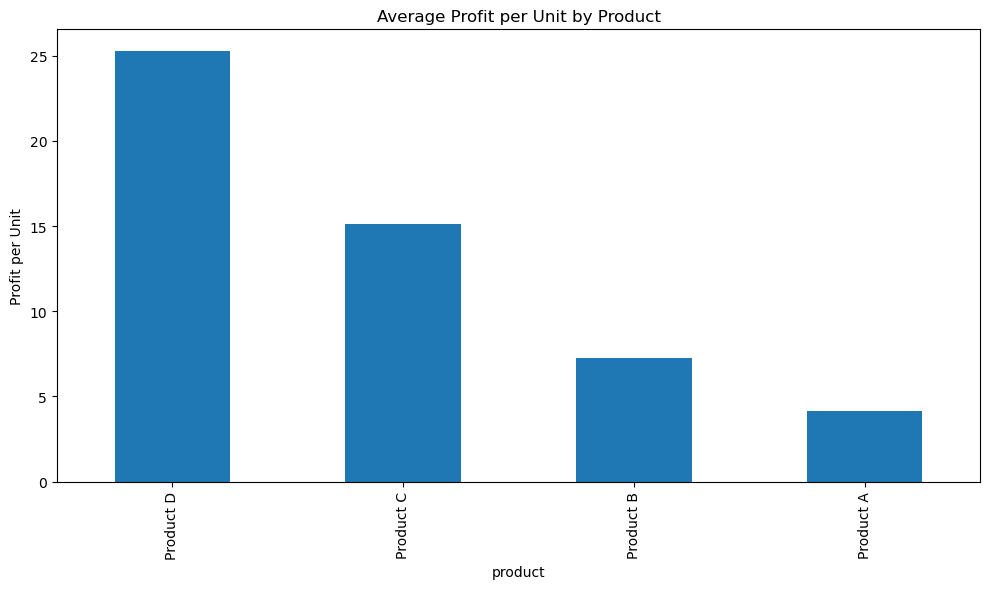

In [4]:
unit_summary["avg_profit_per_unit"].plot(
    kind = "bar",
    figsize = (10,6),
    title = "Average Profit per Unit by Product"
)

plt.ylabel("Profit per Unit")
plt.tight_layout()
plt.show()

The figure shows that unit profitability can be increased by scaling products D & C, the rest show unhealthy margins which could indicate lots of leakage.

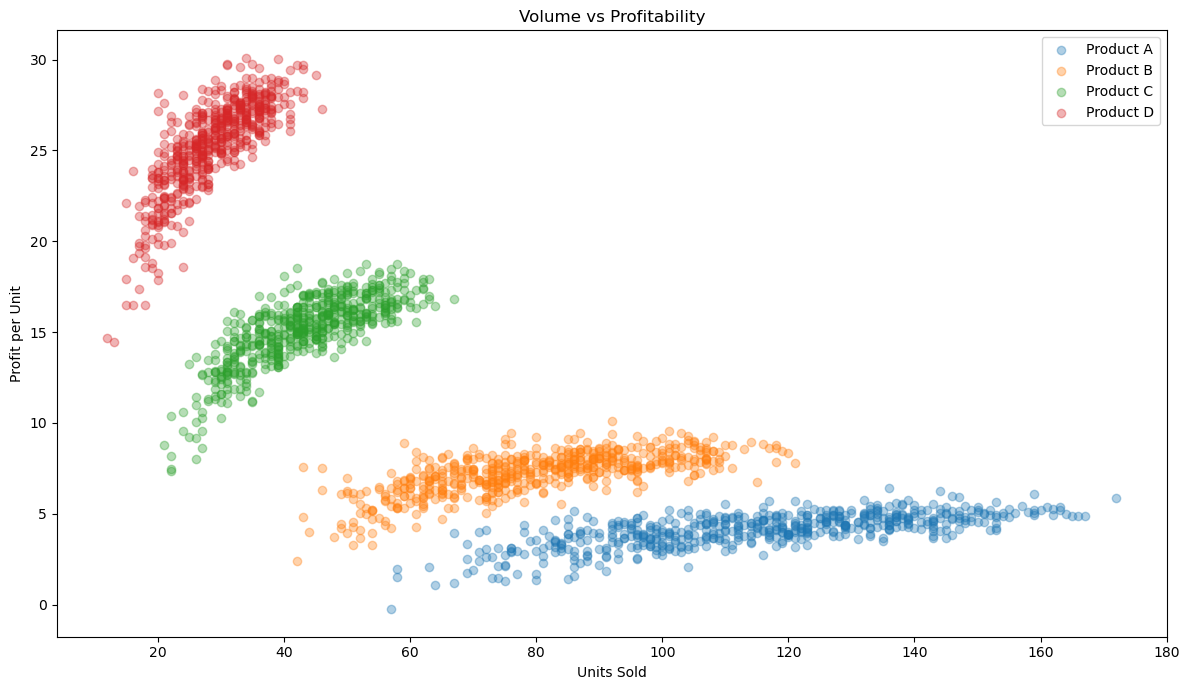

In [5]:
plt.figure(figsize=(12,7))

for product in df["product"].unique():
    subset = df[df["product"] == product]
    plt.scatter(
        subset["units_sold"],
        subset["net_profit_per_unit"],
        alpha=0.35,
        label=product
    )

plt.xlabel("Units Sold")
plt.ylabel("Profit per Unit")
plt.title("Volume vs Profitability")
plt.legend()
plt.tight_layout()
plt.show()

Products C and D generate significantly higher profit per unit compared to Products A and B. Although Products A and B sell more units, their profitability per unit remains low. This suggests that scaling higher-margin products will improve overall profitability more effectively than relying on volume alone.

## Unit Economics Conclusion
Unit-level analysis reveals that profitability is primarily driven by margin strength rather than volume. Products with stronger profit per unit demonstrate better scalability and resilience. Strategically, the business should prioritise scaling higher-margin products to maximise profitability and reduce operational risk.